In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Dados 2\spotify.csv")
df.head()

,Date,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
0,2017-01-06,12287078,NaN,NaN,NaN,NaN
1,2017-01-07,13190270,NaN,NaN,NaN,NaN
2,2017-01-08,13099919,NaN,NaN,NaN,NaN
3,2017-01-09,14506351,NaN,NaN,NaN,NaN
4,2017-01-10,14275628,NaN,NaN,NaN,NaN


In [3]:
df.drop("Despacito", inplace = True, axis = 1)

In [5]:
df.drop("Something Just Like This", inplace = True, axis = 1)

In [6]:
df.drop("HUMBLE.", inplace = True, axis = 1)

In [7]:
df.drop("Unforgettable", inplace = True, axis = 1)

In [10]:
df.head()

,Date,Shape of You
0,2017-01-06,12287078
1,2017-01-07,13190270
2,2017-01-08,13099919
3,2017-01-09,14506351
4,2017-01-10,14275628


In [39]:
df.isnull()

,Data,Pessoas
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
361,False,False
362,False,False
363,False,False
364,False,False


In [11]:
df.columns = ["Data", "Pessoas"]
df

,Data,Pessoas
0,2017-01-06,12287078
1,2017-01-07,13190270
2,2017-01-08,13099919
3,2017-01-09,14506351
4,2017-01-10,14275628
...,...,...
361,2018-01-05,4492978
362,2018-01-06,4416476
363,2018-01-07,4009104
364,2018-01-08,4135505


In [13]:
df.tail()

,Data,Pessoas
361,2018-01-05,4492978
362,2018-01-06,4416476
363,2018-01-07,4009104
364,2018-01-08,4135505
365,2018-01-09,4168506


In [14]:
df.describe()

,Pessoas
count,3.660000e+02
mean,8.180297e+06
std,4.233482e+06
min,3.497682e+06
25%,4.447564e+06
50%,6.631300e+06
75%,1.192114e+07
max,1.976474e+07


In [12]:
df.shape

(366, 2)

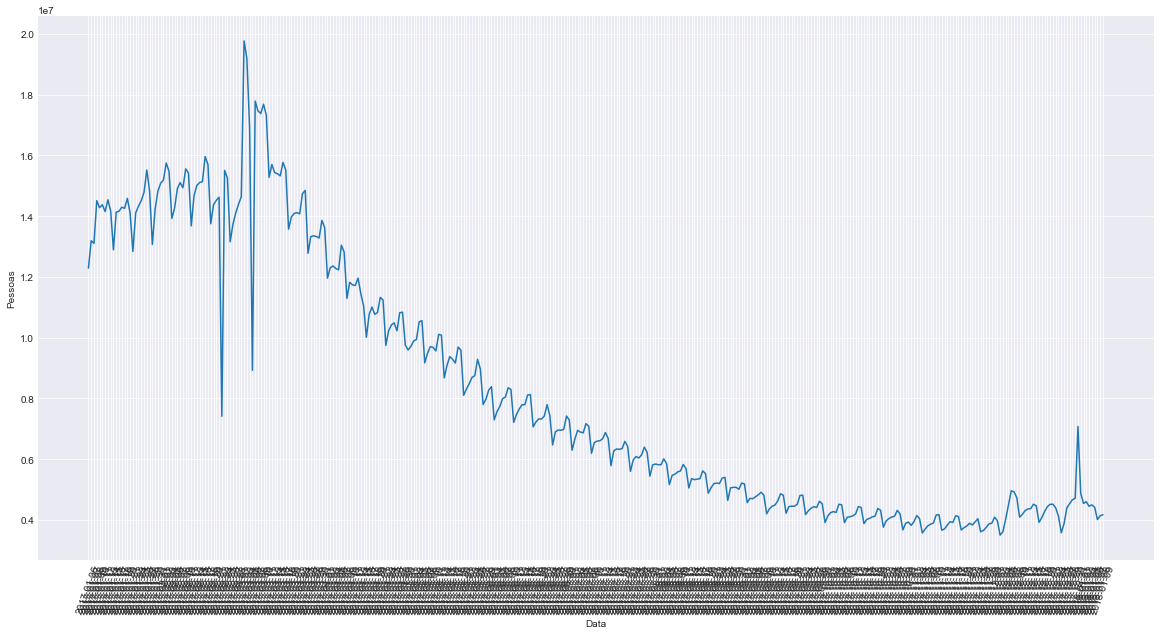

In [32]:
plt.figure(figsize=(20, 10))
plt.style.use('seaborn-darkgrid')

x1 = sns.lineplot(x="Data", y="Pessoas", data=df)
plt.xticks(rotation=70);
plt.show()

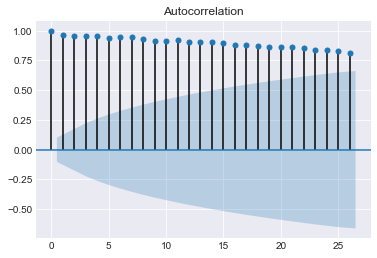

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df["Pessoas"]);

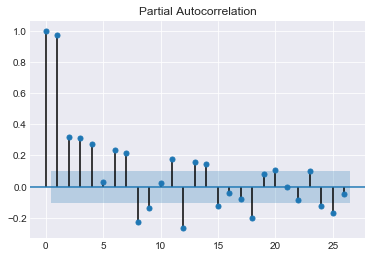

In [34]:
plot_pacf(df["Pessoas"]);

**Previsoes**

In [35]:
df_x1 = df[:26][:]
df_x2 = df[26:][:]

**Modelo ARIMA**

In [19]:
from pmdarima.arima import auto_arima

modelo_arima = auto_arima(df_x1["Pessoas"].values, start_p = 0, start_q = 0,
                         max_p = 8, max_q = 8, d = 2, seasonal = False, trace = True,
                         error_action = "ignore", suppress_warnings = True, stepwise = False)

Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=745.671, BIC=748.027, Time=0.024 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=752.638, BIC=756.172, Time=0.019 seconds
Fit ARIMA(0,2,2)x(0,0,0,0) [intercept=True]; AIC=741.792, BIC=746.505, Time=0.029 seconds
Fit ARIMA(0,2,3)x(0,0,0,0) [intercept=True]; AIC=745.250, BIC=751.140, Time=0.032 seconds
Fit ARIMA(0,2,4)x(0,0,0,0) [intercept=True]; AIC=747.468, BIC=754.536, Time=0.034 seconds
Fit ARIMA(0,2,5)x(0,0,0,0) [intercept=True]; AIC=782.390, BIC=790.637, Time=0.037 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=748.515, BIC=752.049, Time=0.014 seconds
Fit ARIMA(1,2,1)x(0,0,0,0) [intercept=True]; AIC=749.431, BIC=754.143, Time=0.030 seconds
Fit ARIMA(1,2,2)x(0,0,0,0) [intercept=True]; AIC=743.330, BIC=749.220, Time=0.032 seconds
Fit ARIMA(1,2,3)x(0,0,0,0) [intercept=True]; AIC=745.006, BIC=752.074, Time=0.074 seconds
Fit ARIMA(1,2,4)x(0,0,0,0) [intercept=True]; AIC=749.549, BIC=757.795, Time=0.065 seconds
Fit ARIMA(

In [21]:
modelo_arima.aic()

740.5815282171212

In [36]:
modelo_arima.fit(df_x1["Pessoas"]. values)

model_predict = modelo_arima.predict(n_periods = 10)
model_predict

array([14381639.22333163, 14721752.57662746, 15715289.52506302,
       15607886.62458522, 15300979.59504826, 16140881.76762893,
       16637514.58718135, 16109895.17297474, 16339744.19721464,
       17217973.9090365 ])

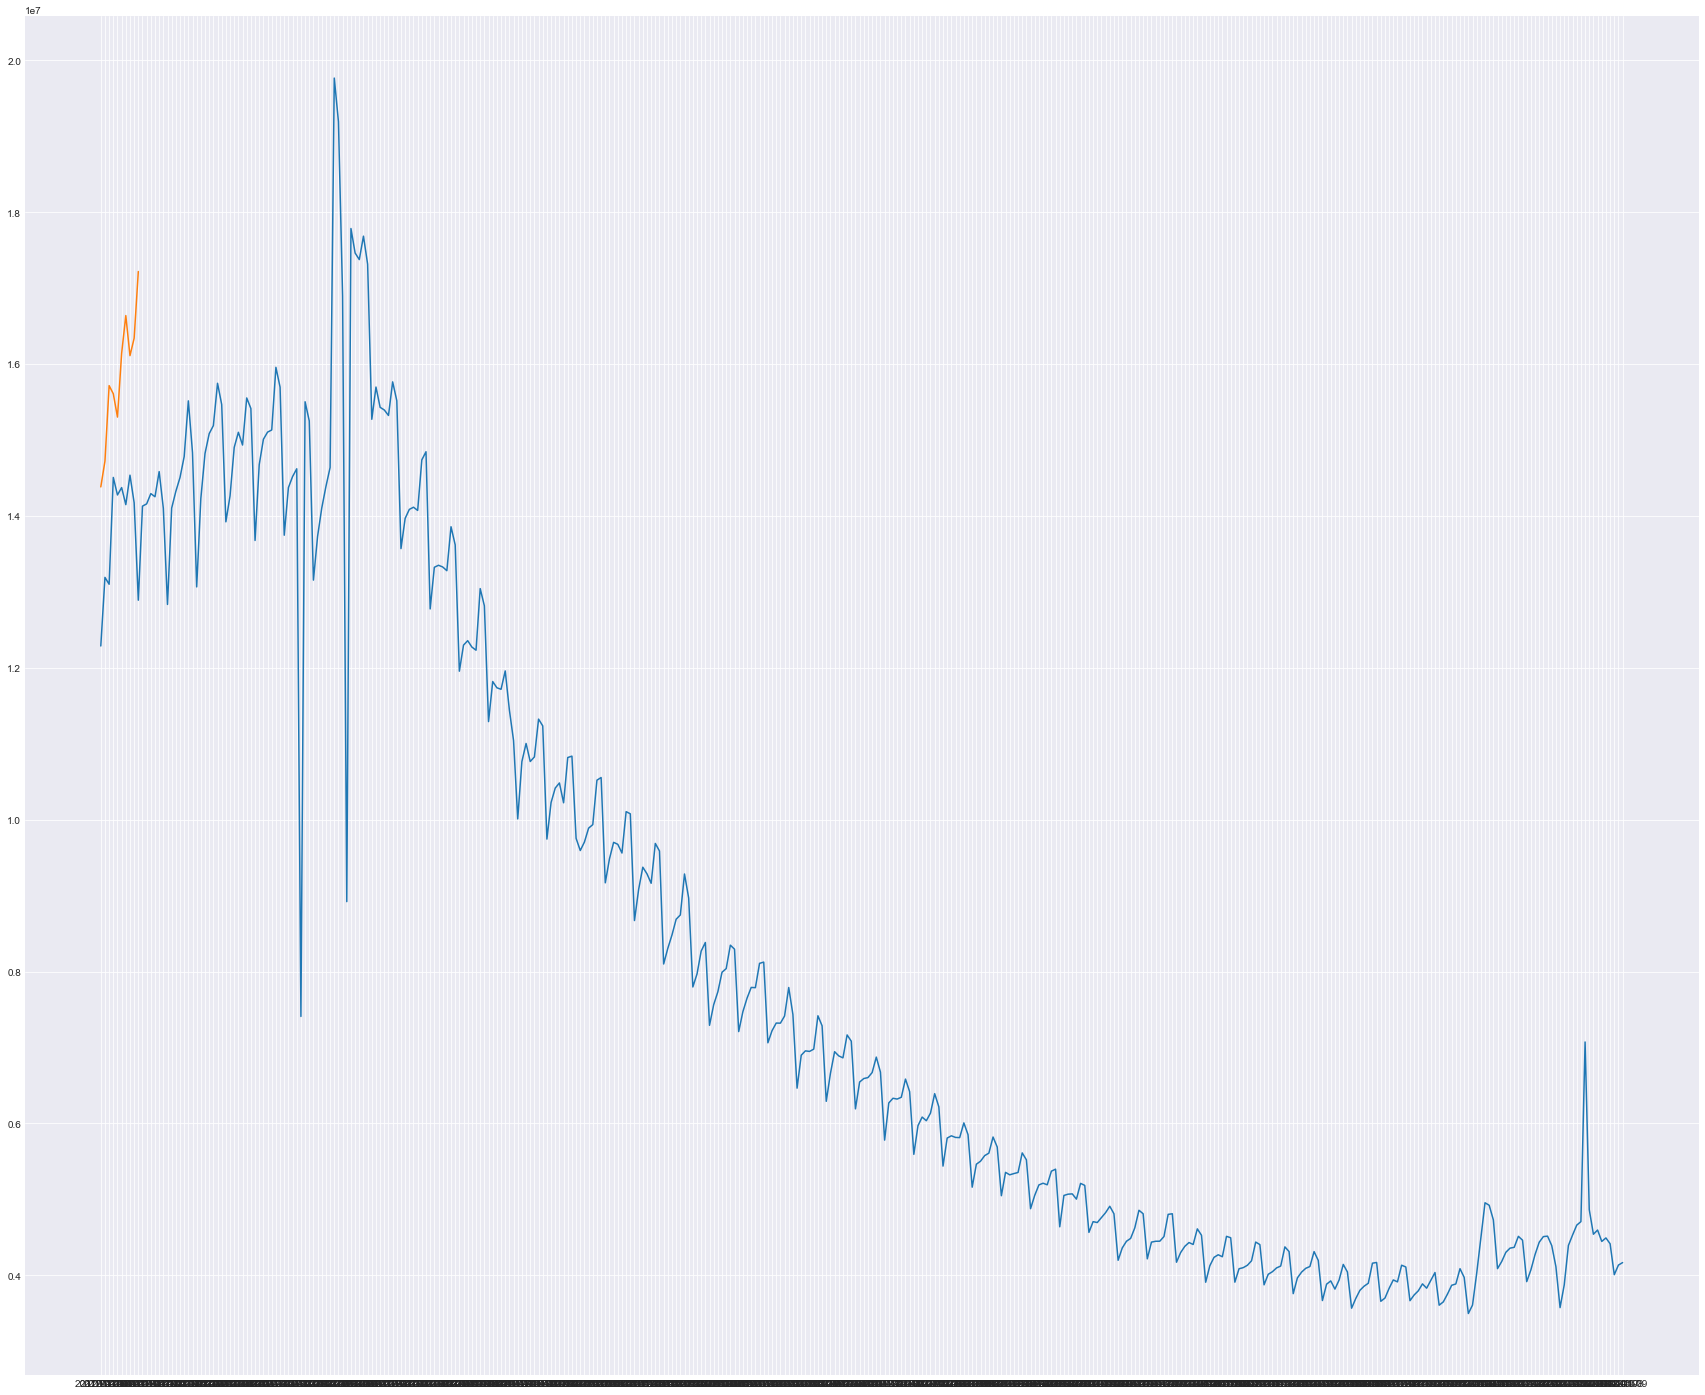

In [46]:
plt.figure(figsize=(30,25))

plt.plot(df["Data"], df["Pessoas"])
plt.plot(model_predict)